# Red Data

In [1]:
#------------------------------------------------------------------------
# Date: 26/10/22 Written by Konstantinos Doran
#------------------------------------------------------------------------
#import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#order has no units, its an integer, angle has units in degrees ans so does dangle
aorder, aangle, adangle = np.loadtxt("Red wave data.csv", delimiter = ",", unpack = True)
asinangle = np.sin(aangle*(np.pi/180)) # unitless
adsine = np.cos(aangle*np.pi/180)*adangle
print(asinangle)



[-0.58495767 -0.38751559 -0.19451968  0.19423435  0.38992769  0.58401352]


In [2]:
#fit a straight line as using Hooke's Law
poldegree = 1

#find gradient and y-intercept plus error

acoeff,aerror = np.polyfit(aorder, asinangle, poldegree, w=1/adsine, cov = "unscaled")
agrad,aint = acoeff
adgrad,adint = np.sqrt(np.diag(aerror))

#output raw value and value to appropriate s.f
print(f"Red gradient = {agrad} +- {adgrad}") #units
print(f"Red intercept = {aint} +- {adint}") #units
print(f"Red gradient = {agrad:.3f} +- {adgrad:.3f} to 3dp") #unitless
print(f"Red intercept = {aint:.3f} +- {adint:.2f} to 3dp") #unitless

Red gradient = 0.1946911578775968 +- 0.0048135696056548416
Red intercept = 0.00014829815866028868 +- 0.010974722148959622
Red gradient = 0.195 +- 0.005 to 3dp
Red intercept = 0.000 +- 0.01 to 3dp


# Turquoise Data

In [3]:
border, bangle, bdangle = np.loadtxt("Turquoise wave data.csv", delimiter = ",", unpack = True)
bsinangle = np.sin(bangle*(np.pi/180)) # unitless
print(bangle)
bdsine = np.cos(bangle*np.pi/180)*bdangle
print(bsinangle)

[-25.666666  -16.7166666  -8.2166666   8.333333   16.783333 ]
[-0.43313478 -0.28763913 -0.14291684  0.14493185  0.28875331]


In [4]:
#fit a straight line as using Hooke's Law
poldegree = 1

#find gradient and y-intercept plus error

bcoeff,berror = np.polyfit(border, bsinangle, poldegree, w=1/bdsine, cov = "unscaled")
bgrad,bint = bcoeff
bdgrad,bdint = np.sqrt(np.diag(berror))

#output raw value and value to appropriate s.f
print(f"weighted gradient = {bgrad} +- {bdgrad}") #units
print(f"weighted intercept = {bint} +- {bdint}") #units
print(f"weighted gradient = {bgrad:.3f} +- {bdgrad:.3f} to 3dp") #unitless
print(f"weighted intercept = {bint:.4f} +- {bdint:.3f} to 4dp") #unitless

weighted gradient = 0.14431852165777245 +- 0.007577333196455906
weighted intercept = 0.0005594697357282802 +- 0.015164292666269305
weighted gradient = 0.144 +- 0.008 to 3dp
weighted intercept = 0.0006 +- 0.015 to 4dp


# Violet Data

In [5]:
corder, cangle, cdangle = np.loadtxt("Violetwavedata.csv", delimiter = ",", unpack = True)
csinangle = np.sin(cangle*(np.pi/180)) # unitless
print(cangle)
cdsine = np.cos(cangle*np.pi/180)*cdangle
print(csinangle)

[-14.8       -7.3        7.383333  15.1     ]
[-0.25544576 -0.12706461  0.12850712  0.26050451]


In [6]:
#fit a straight line as using Hooke's Law
poldegree = 1

#find gradient and y-intercept plus error

ccoeff,cerror = np.polyfit(corder, csinangle, poldegree, w=1/cdsine, cov = "unscaled")
cgrad,cint = ccoeff
cdgrad,cdint = np.sqrt(np.diag(cerror))

#output raw value and value to appropriate s.f
print(f"weighted gradient = {cgrad} +- {cdgrad}") #units
print(f"weighted intercept = {cint} +- {cdint}") #units
print(f"weighted gradient = {cgrad:.3f} +- {cdgrad:.3f} to 3dp") #unitless
print(f"weighted intercept = {cint:.4f} +- {cdint:.3f} to 4dp") #unitless

weighted gradient = 0.12875760949902595 +- 0.010236394307067848
weighted intercept = 0.0016492437488599063 +- 0.01631188309822814
weighted gradient = 0.129 +- 0.010 to 3dp
weighted intercept = 0.0016 +- 0.016 to 4dp


Text(-3, -1.2, 'Red fit y = (0.195 +- 0.005)x + (0.00 +- 0.01)\nTurquoise fit y = (0.144 +- 0.008)x + (0.00 +- 0.02)\nViolet fit y = (0.13 +- 0.01)x + (0.00 +- 0.02)\n')

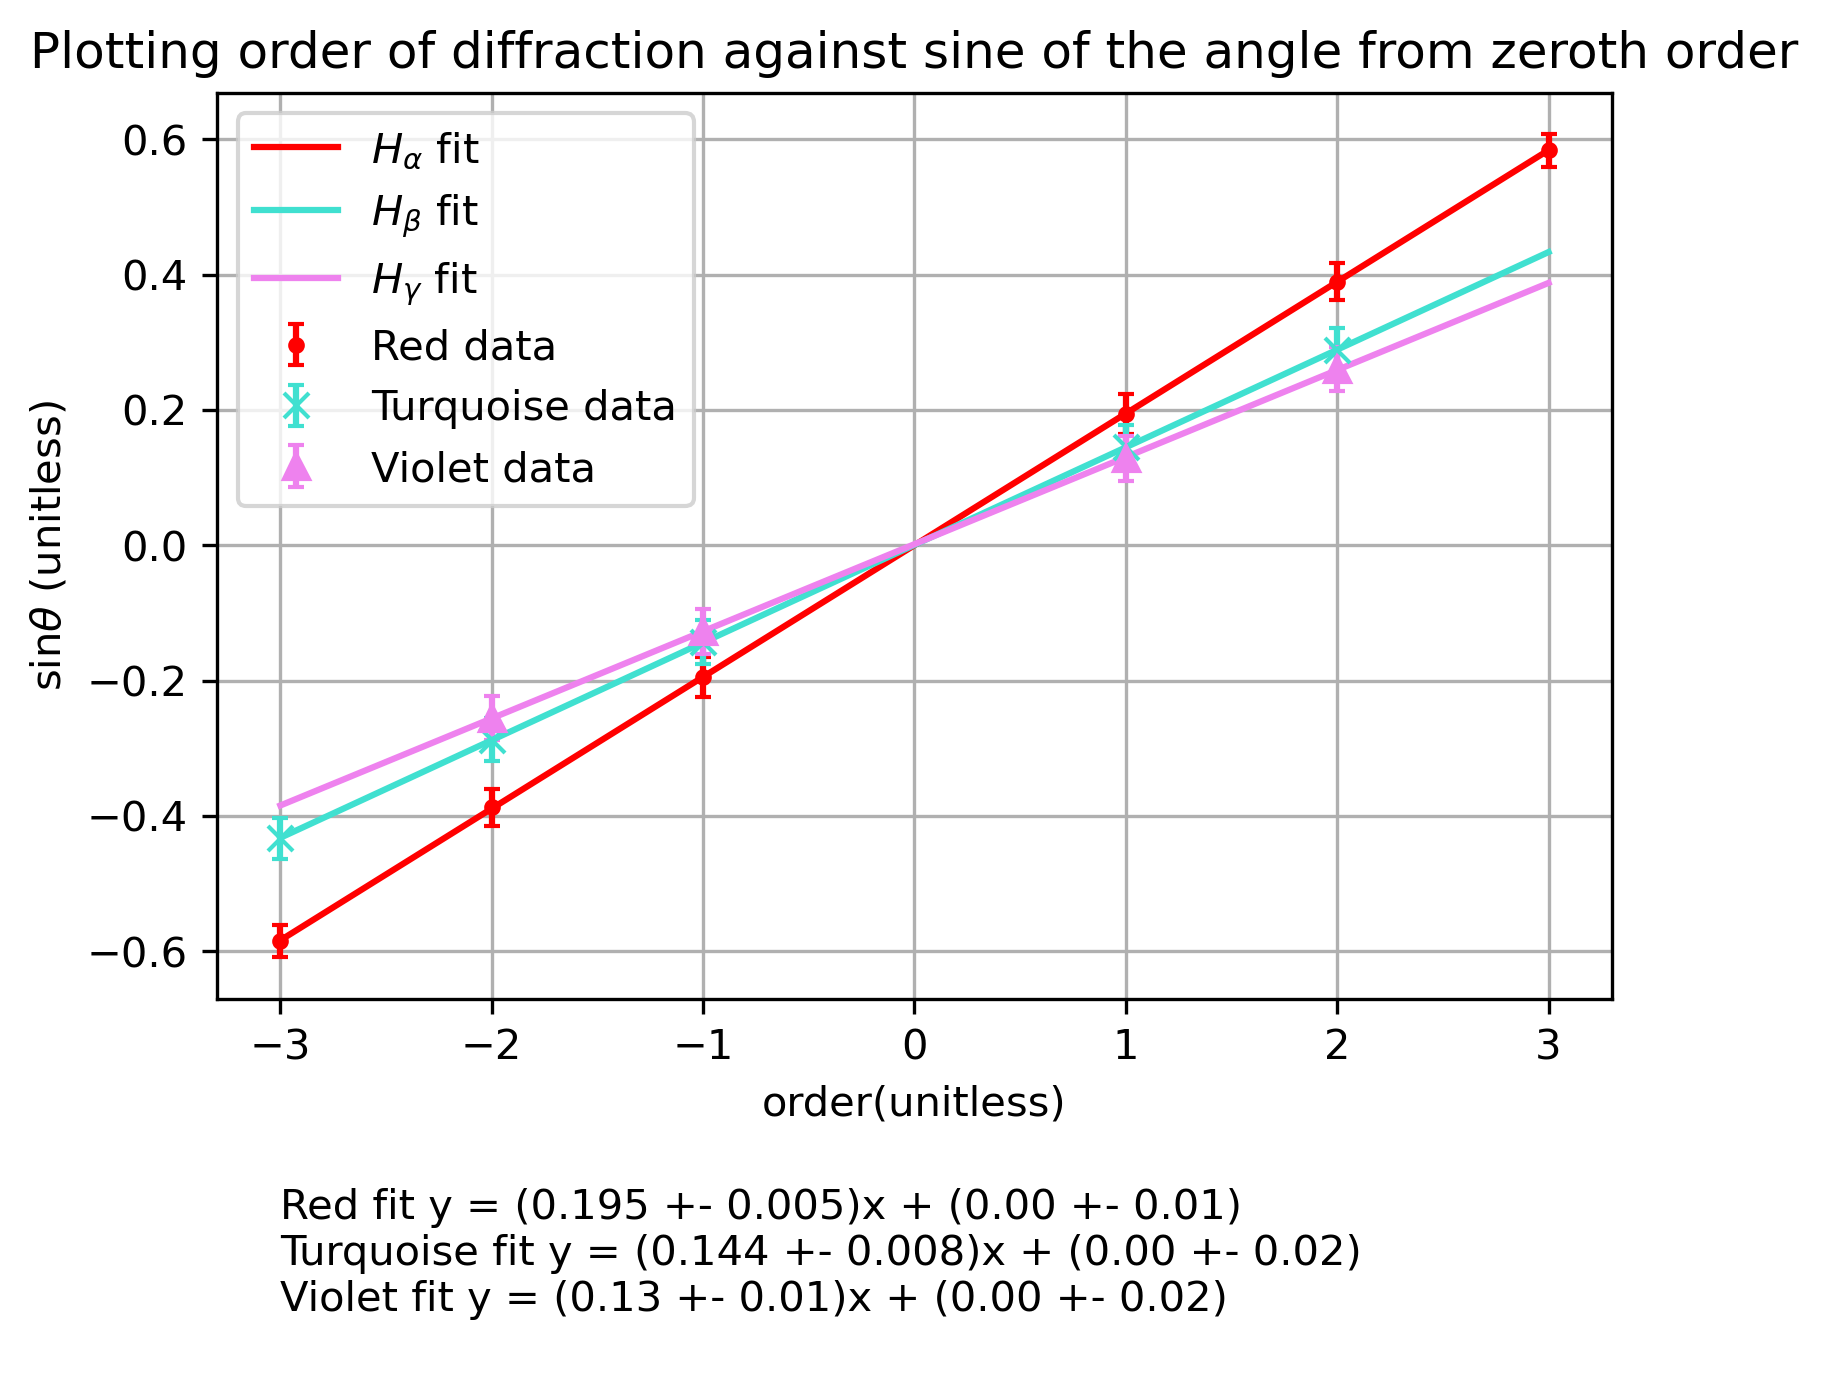

In [7]:
#create weighted lines
xline = np.array([-3,-1,0,1, 3])
ayline = agrad *xline + aint
byline = bgrad *xline + bint
cyline = cgrad *xline + cint
#code adapted from Unit4Notes:https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305180
#plot graph
plt.figure(dpi=300)
#add a grid
plt.grid(True)
plt.title("Plotting order of diffraction against sine of the angle from zeroth order")
plt.xlabel("order(unitless)") #label x axis
plt.ylabel(r"sin$ \theta$ (unitless)") #label y axis
plt.errorbar(aorder, asinangle, yerr = adsine, fmt=".", label ="Red data", capsize=2, color = "red")
plt.errorbar(border, bsinangle, yerr = bdsine, fmt="x", label ="Turquoise data", capsize=2, color = "turquoise")
plt.errorbar(corder, csinangle, yerr = cdsine, fmt="^", label ="Violet data", capsize=2, color = "violet")
plt.plot(xline, ayline, label = r"$H_{\alpha}$ fit ",color = "red" )
plt.plot(xline, byline, label = r"$H_{\beta}$ fit " , color = "turquoise")
plt.plot(xline, cyline, label = r"$H_{\gamma}$ fit " , color = "violet")
plt.legend(loc="best")
plt.text(-3,-1.2,f"""Red fit y = ({agrad:.3f} +- {adgrad:.3f})x + ({aint:.2f} +- {adint:.2f})
Turquoise fit y = ({bgrad:.3f} +- {bdgrad:.3f})x + ({bint:.2f} +- {bdint:.2f})
Violet fit y = ({cgrad:.2f} +- {cdgrad:.2f})x + ({cint:.2f} +- {cdint:.2f})
""")
